In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import lib.galaxy_utilities as gu

In [2]:
catalog = fits.open(os.path.join('lib', 'NSA_GalaxyZoo.fits'))
hdu = catalog[1]
smooth = hdu.data['t01_smooth_or_features_a01_smooth_debiased'] > 0.5
featured = hdu.data['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.5
spiral = featured & (hdu.data['t04_spiral_a08_spiral_debiased'] > 0.5)
no_spiral = featured & (hdu.data['t04_spiral_a09_no_spiral_debiased'] > 0.5)

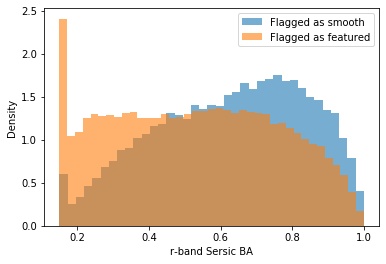

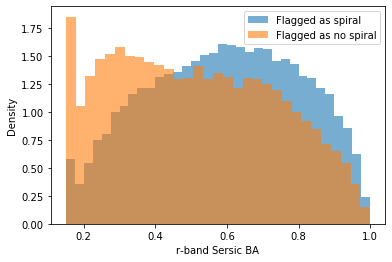

In [3]:
axRatios = hdu.data['SERSIC_BA']
plt.hist(axRatios[smooth], alpha=0.6, label='Flagged as smooth', bins='scott', density=True)
plt.hist(axRatios[featured], alpha=0.6, label='Flagged as featured', bins='scott', density=True)
plt.legend()
plt.xlabel('r-band Sersic BA')
plt.ylabel('Density');

plt.figure()
axRatios = hdu.data['SERSIC_BA']
plt.hist(axRatios[spiral & (axRatios > 0.0)], alpha=0.6, label='Flagged as spiral', bins='scott', density=True)
plt.hist(axRatios[no_spiral & (axRatios > 0.0)], alpha=0.6, label='Flagged as no spiral', bins='scott', density=True)
plt.legend()
plt.xlabel('r-band Sersic BA')
plt.ylabel('Density');